In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
d3 = pd.read_csv('/Users/aq2003/Capstone/data/google_play_reviews.csv')
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     4888 non-null   int64 
 1   app_name       4888 non-null   object
 2   app_genre      3018 non-null   object
 3   avg_rating     4888 non-null   object
 4   num_downloads  4888 non-null   object
 5   num_reviews    4888 non-null   object
 6   user           4888 non-null   object
 7   review_text    4888 non-null   object
 8   rating         4888 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 343.8+ KB


In [3]:
review_df = d3[['app_name','review_text','rating']]
review_df

,app_name,review_text,rating
0,VPN Proxy Master - Safer Vpn,"Annoying, automatic server selection not worki...",1
1,VPN Proxy Master - Safer Vpn,"The app works. Barely. It does have a vpn, and...",2
2,VPN Proxy Master - Safer Vpn,Very good quality. I really liked it i hope it...,5
3,Busuu: Learn Languages,It's awesome. It's not just an app for learnin...,5
4,Busuu: Learn Languages,I used a free trial version for a couple of da...,3
...,...,...,...
4883,Geometry Dash Lite,I got high hopes for this update and I actuall...,3
4884,Geometry Dash Lite,This is Epic I kinda wish the full version wer...,5
4885,Earn to Die 2,This game is awesome. I just beat it at just u...,5
4886,Earn to Die 2,This is really a good game with great graphics...,4


In [4]:
review_df["sentiment"] = 0
for i in range(0, 4887):
    if (review_df.at[i,'rating'] > 2):
        review_df.at[i,'sentiment'] = 1

In [5]:
review_df

,app_name,review_text,rating,sentiment
0,VPN Proxy Master - Safer Vpn,"Annoying, automatic server selection not worki...",1,0
1,VPN Proxy Master - Safer Vpn,"The app works. Barely. It does have a vpn, and...",2,0
2,VPN Proxy Master - Safer Vpn,Very good quality. I really liked it i hope it...,5,1
3,Busuu: Learn Languages,It's awesome. It's not just an app for learnin...,5,1
4,Busuu: Learn Languages,I used a free trial version for a couple of da...,3,1
...,...,...,...,...
4883,Geometry Dash Lite,I got high hopes for this update and I actuall...,3,1
4884,Geometry Dash Lite,This is Epic I kinda wish the full version wer...,5,1
4885,Earn to Die 2,This game is awesome. I just beat it at just u...,5,1
4886,Earn to Die 2,This is really a good game with great graphics...,4,1


In [10]:
train_data = review_df.drop('rating', axis=1)
train_data = train_data.drop('app_name', axis=1)
train_data

,review_text,sentiment
0,"Annoying, automatic server selection not worki...",0
1,"The app works. Barely. It does have a vpn, and...",0
2,Very good quality. I really liked it i hope it...,1
3,It's awesome. It's not just an app for learnin...,1
4,I used a free trial version for a couple of da...,1
...,...,...
4883,I got high hopes for this update and I actuall...,1
4884,This is Epic I kinda wish the full version wer...,1
4885,This game is awesome. I just beat it at just u...,1
4886,This is really a good game with great graphics...,1


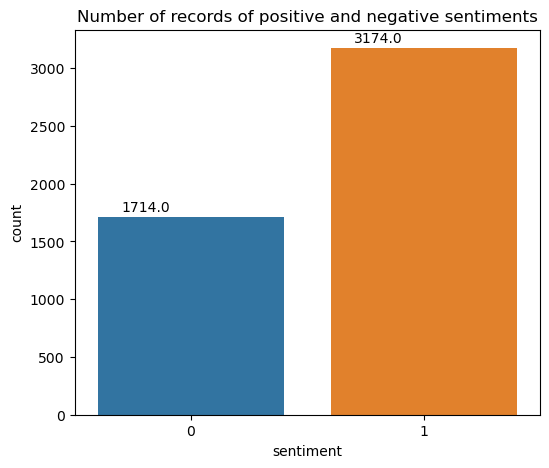

In [12]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.figure(figsize=(6,5))
plt.title("Number of records of positive and negative sentiments")
plot = sn.countplot(x = 'sentiment', data=train_data)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+0.1 ,p.get_height()+50))

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorize = CountVectorizer()

feature_vector =  count_vectorize.fit(train_data.review_text)

features = feature_vector.get_feature_names()

print("total number of features: ", len(features))

total number of features:  12152


In [17]:
import random

random.sample(features,10)

['respawn',
 'o2',
 'bothersome',
 'robtop',
 'trades',
 'ocasions',
 'numerical',
 'precise',
 'precipitation',
 'children']

In [19]:
train_ds_features = count_vectorize.transform(train_data.review_text)

type(train_ds_features)

scipy.sparse.csr.csr_matrix

In [20]:
train_ds_features.getnnz()

230639

In [21]:
print("Density of the matrix: ", train_ds_features.getnnz()*100/

               (train_ds_features.shape[0]*train_ds_features.shape[1]))

Density of the matrix:  0.3882878384974179


In [22]:
train_ds_df = pd.DataFrame(train_ds_features.todense())

train_ds_df.columns = features

train_data[0:1]

,review_text,sentiment
0,"Annoying, automatic server selection not worki...",0


Text(0, 0.5, 'Density')

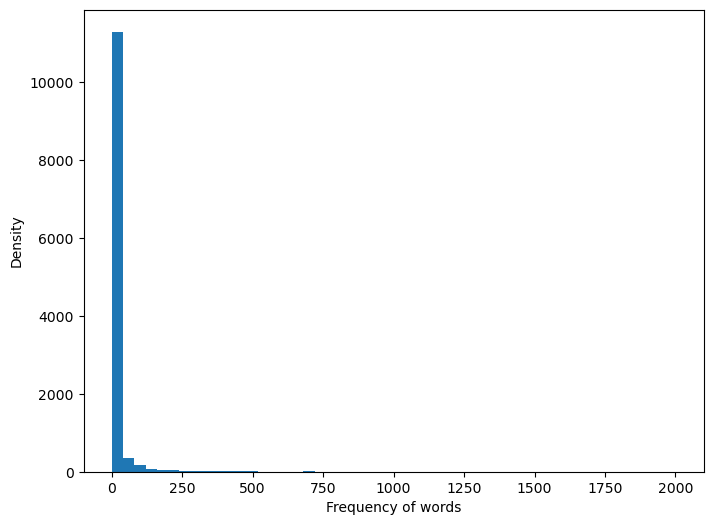

In [23]:
features_counts = np.sum(train_ds_features.toarray(),axis=0)

features_counts_df = pd.DataFrame(dict(features = features, counts = features_counts))

plt.figure(figsize=(8,6))

plt.hist(features_counts_df.counts, bins=50, range=(0,2000))

plt.xlabel("Frequency of words")

plt.ylabel('Density')

In [25]:
len(features_counts_df[features_counts_df.counts==1])

5452

In [27]:
count_vectorizer =  CountVectorizer(max_features=1000)

feature_vector = count_vectorizer.fit(train_data.review_text)

features = feature_vector.get_feature_names()

train_ds_features = count_vectorizer.transform(train_data.review_text)

features_counts =  np.sum(train_ds_features.toarray(),axis=0)

features_counts = pd.DataFrame(dict(features = features, counts = features_counts))

features_counts.sort_values('counts', ascending=False)[0:15]

,features,counts
850,the,15421
869,to,10419
444,it,9786
46,and,8584
440,is,5369
995,you,4618
581,of,4114
861,this,4046
56,app,3920
331,for,3806


In [29]:
from sklearn.feature_extraction import text

my_stop_words = text.ENGLISH_STOP_WORDS

print("Few stop words: ", list(my_stop_words)[0:10])

Few stop words:  ['un', 'namely', 'call', 'both', 'whom', 'but', 'what', 'couldnt', 'down', 'latter']


<AxesSubplot: xlabel='Sentiment', ylabel='awesome'>

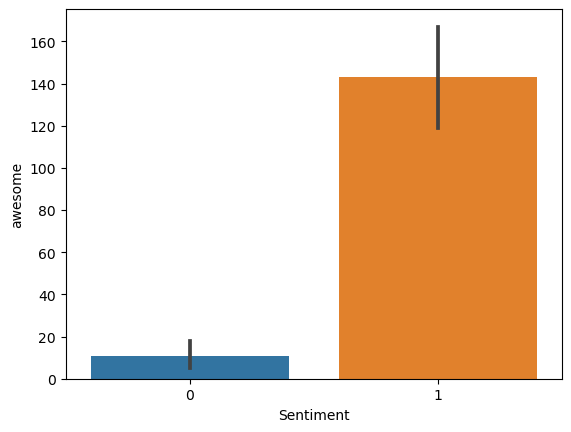

In [31]:
train_ds_df = pd.DataFrame(train_ds_features.todense())

train_ds_df.columns = features

train_ds_df['Sentiment'] = train_data.sentiment

sn.barplot(x = 'Sentiment',y = 'awesome', data = train_ds_df, estimator= sum)

In [33]:
count_vectorizer =  CountVectorizer(stop_words= my_stop_words, max_features= 1000)

feature_vector =  count_vectorizer.fit(train_data.review_text)

train_ds_features =  count_vectorizer.transform(train_data.review_text)

features = feature_vector.get_feature_names()

features_counts = np.sum(train_ds_features.toarray(), axis = 0)

features_counts = pd.DataFrame(dict(features =  features, counts = features_counts))

features_counts.sort_values("counts", ascending= False)[0:15]

,features,counts
50,app,3920
357,game,3367
479,like,1418
451,just,1386
875,time,1179
32,ads,1141
375,good,1095
380,great,1041
689,really,988
928,use,915


In [38]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =  train_test_split(train_ds_features, train_data.sentiment, 
                                                     test_size = 0.3, random_state = 42)

In [39]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit(train_x.toarray(), train_y)

BernoulliNB()

In [40]:
test_ds_predicted = nb_clf.predict(test_x.toarray())

In [41]:
from sklearn import metrics
print(metrics.classification_report(test_y,test_ds_predicted))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       519
           1       0.82      0.83      0.83       948

    accuracy                           0.77      1467
   macro avg       0.75      0.75      0.75      1467
weighted avg       0.77      0.77      0.77      1467



<AxesSubplot: >

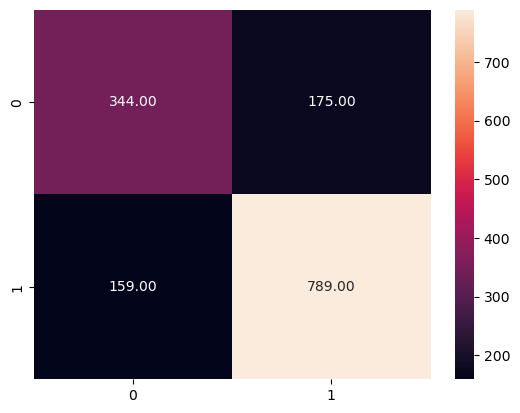

In [42]:
cm = metrics.confusion_matrix(test_y, test_ds_predicted)
sn.heatmap(cm, annot=True, fmt = '.2f')